# imports

In [2]:
import os,sys
from pathlib import Path
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [37]:
# paths
root = Path.home()
config = root.joinpath("Code","atree","config")
sys.path += [str(root),str(config)]
# opPath = root.joinpath("Code","atree","outputs","groundwater","levels","preprocessed")
# print("data saved in :",opPath)

filePath = root.joinpath("Data","groundwater","aquifers","india_principal_aquifers.shp")
opPath = root.joinpath("Data","groundwater","aquifers","india_principal_aquifers_sy_cgwb.shp")
aqCodesPath = root.joinpath("Data","groundwater","aquifers","india_principal_aquifers.csv")

# read in data

In [12]:
gdf = gpd.read_file(filePath,driver='shapefile')
keepcols = ["aquifer","newcode43","aquifer0","geometry"]
gdf_light = gdf.loc[:,keepcols]

gdf_light.head()

,aquifer,newcode43,aquifer0,geometry
0,Basalt,BS01,Basic Rocks (Basalt),"MULTIPOLYGON (((998764.318 1694946.315, 998043..."
1,Gneiss,GN01,Undifferentiated metasedimentaries/ Undifferen...,"MULTIPOLYGON (((779646.951 1756167.620, 781182..."
2,Gneiss,GN03,Migmatitic Gneiss,"POLYGON ((1360161.311 2083353.975, 1359817.469..."
3,Quartzite,QZ01,Quartzite,"MULTIPOLYGON (((973097.489 1731405.847, 973186..."
4,Quartzite,QZ02,Quartzite,"MULTIPOLYGON (((1394403.104 2062358.522, 13948..."


In [10]:
gdf_aqc = pd.read_csv(aqCodesPath)
gdf_aqc.head()

,newcode43,aquifer0,min,max,unique
0,AL01,Younger Alluvium (Clay/Silt/Sand/ Calcareous c...,8,12,yes
1,AL02,Pebble / Gravel/ Bazada/ Kandi,12,20,yes
2,AL03,Older Alluvium (Silt/Sand/Gravel/Lithomargic c...,4,8,yes
3,AL04,Aeolian Alluvium (Silt/ Sand),12,20,yes
4,AL05,Coastal Alluvium (Sand/Silt/Clay),8,12,yes


In [34]:
cgwb = gdf_light.merge(gdf_aqc,on=['newcode43','aquifer0'])

In [35]:
cgwb[['sy_mean']] = cgwb[['min','max']].mean(axis=1)

<AxesSubplot:>

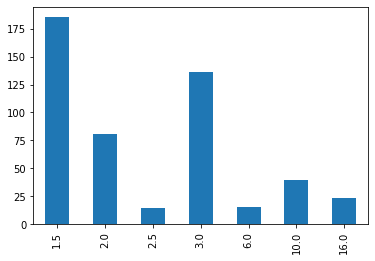

In [36]:
cgwb["sy_mean"].value_counts().sort_index().plot(kind='bar')

In [38]:
cgwb.to_file(opPath)